# Test de RemBG - Suppression d'arrière-plan

Ce notebook permet de tester la bibliothèque RemBG pour supprimer l'arrière-plan d'images.

**Objectifs :**
- Tester RemBG sur plusieurs images
- Évaluer la qualité des résultats
- Mesurer les performances (temps de traitement)
- Identifier les cas problématiques

## 1. Importation des bibliothèques

In [2]:
import os
import time
from pathlib import Path
from typing import List, Dict

# Bibliothèques de traitement d'image
from rembg import remove
from PIL import Image
import numpy as np

# Pour l'affichage dans le notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt

print("✅ Toutes les bibliothèques sont importées avec succès !")

✅ Toutes les bibliothèques sont importées avec succès !


## 2. Configuration des chemins

In [3]:
# Créer les dossiers nécessaires
INPUT_DIR = Path("images_test")
OUTPUT_DIR = Path("images_output")

INPUT_DIR.mkdir(exist_ok=True)
OUTPUT_DIR.mkdir(exist_ok=True)

print(f"📁 Dossier d'entrée: {INPUT_DIR.absolute()}")
print(f"📁 Dossier de sortie: {OUTPUT_DIR.absolute()}")
print("\n⚠️  Placez vos images de test dans le dossier 'images_test'")

📁 Dossier d'entrée: /Users/aurelienanand/RemoveBG/images_test
📁 Dossier de sortie: /Users/aurelienanand/RemoveBG/images_output

⚠️  Placez vos images de test dans le dossier 'images_test'


## 3. Fonction de traitement d'une image

In [4]:
def process_image(input_path: Path, output_path: Path) -> Dict:
    """
    Traite une image avec RemBG et retourne des statistiques.
    
    Args:
        input_path: Chemin de l'image d'entrée
        output_path: Chemin de l'image de sortie
    
    Returns:
        Dictionnaire contenant les statistiques de traitement
    """
    stats = {
        'filename': input_path.name,
        'success': False,
        'processing_time': 0,
        'input_size': 0,
        'output_size': 0,
        'dimensions': None,
        'error': None
    }
    
    try:
        # Ouvrir l'image d'entrée
        with Image.open(input_path) as img:
            stats['dimensions'] = img.size
            stats['input_size'] = input_path.stat().st_size
            
            # Mesurer le temps de traitement
            start_time = time.time()
            
            # Supprimer l'arrière-plan
            output = remove(img)
            
            processing_time = time.time() - start_time
            stats['processing_time'] = processing_time
            
            # Sauvegarder le résultat
            output.save(output_path)
            stats['output_size'] = output_path.stat().st_size
            stats['success'] = True
            
    except Exception as e:
        stats['error'] = str(e)
    
    return stats

print("✅ Fonction de traitement définie")

✅ Fonction de traitement définie


## 4. Fonction d'affichage comparatif

In [5]:
def display_comparison(input_path: Path, output_path: Path, stats: Dict):
    """
    Affiche une comparaison côte à côte de l'image originale et du résultat.
    """
    if not stats['success']:
        print(f"❌ Erreur pour {input_path.name}: {stats['error']}")
        return
    
    # Charger les images
    img_input = Image.open(input_path)
    img_output = Image.open(output_path)
    
    # Créer la figure
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # Image originale
    axes[0].imshow(img_input)
    axes[0].set_title(f"Original\n{stats['dimensions'][0]}x{stats['dimensions'][1]} px", fontsize=12)
    axes[0].axis('off')
    
    # Image traitée (avec fond transparent)
    # Créer un fond en damier pour visualiser la transparence
    if img_output.mode == 'RGBA':
        # Créer un fond en damier
        checker = np.zeros((*img_output.size[::-1], 3), dtype=np.uint8)
        checker[::20, ::20] = 200
        checker[10::20, 10::20] = 200
        
        # Convertir en image PIL
        checker_img = Image.fromarray(checker)
        checker_img = checker_img.resize(img_output.size)
        
        # Composer l'image sur le fond
        final = Image.new('RGB', img_output.size, (255, 255, 255))
        final.paste(checker_img, (0, 0))
        final.paste(img_output, (0, 0), img_output)
        
        axes[1].imshow(final)
    else:
        axes[1].imshow(img_output)
    
    axes[1].set_title(
        f"Sans arrière-plan\nTemps: {stats['processing_time']:.2f}s",
        fontsize=12
    )
    axes[1].axis('off')
    
    plt.suptitle(f"Résultat pour: {stats['filename']}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Afficher les statistiques
    print(f"\n📊 Statistiques pour {stats['filename']}:")
    print(f"   ⏱️  Temps de traitement: {stats['processing_time']:.3f}s")
    print(f"   📏 Dimensions: {stats['dimensions'][0]} x {stats['dimensions'][1]} px")
    print(f"   💾 Taille entrée: {stats['input_size'] / 1024:.1f} KB")
    print(f"   💾 Taille sortie: {stats['output_size'] / 1024:.1f} KB")
    print(f"   📉 Ratio: {stats['output_size'] / stats['input_size']:.1%}")
    print("="*60)

print("✅ Fonction d'affichage définie")

✅ Fonction d'affichage définie


## 5. Liste des images à traiter

In [6]:
# Extensions d'images supportées
IMAGE_EXTENSIONS = {'.jpg', '.jpeg', '.png', '.bmp', '.webp'}

# Lister toutes les images dans le dossier d'entrée
image_files = [
    f for f in INPUT_DIR.iterdir() 
    if f.is_file() and f.suffix.lower() in IMAGE_EXTENSIONS
]

print(f"🖼️  {len(image_files)} image(s) trouvée(s):")
for img in image_files:
    print(f"   - {img.name}")

if len(image_files) == 0:
    print("\n⚠️  Aucune image trouvée ! Placez des images dans le dossier 'images_test'.")

🖼️  6 image(s) trouvée(s):
   - portrait_style.png
   - person_silhouette.png
   - geometric_shapes.png
   - complex_scene.png
   - object_on_background.png
   - text_image.png


## 6. Traitement de toutes les images

🚀 Début du traitement...

🔄 Traitement de: portrait_style.png


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 199GB/s]


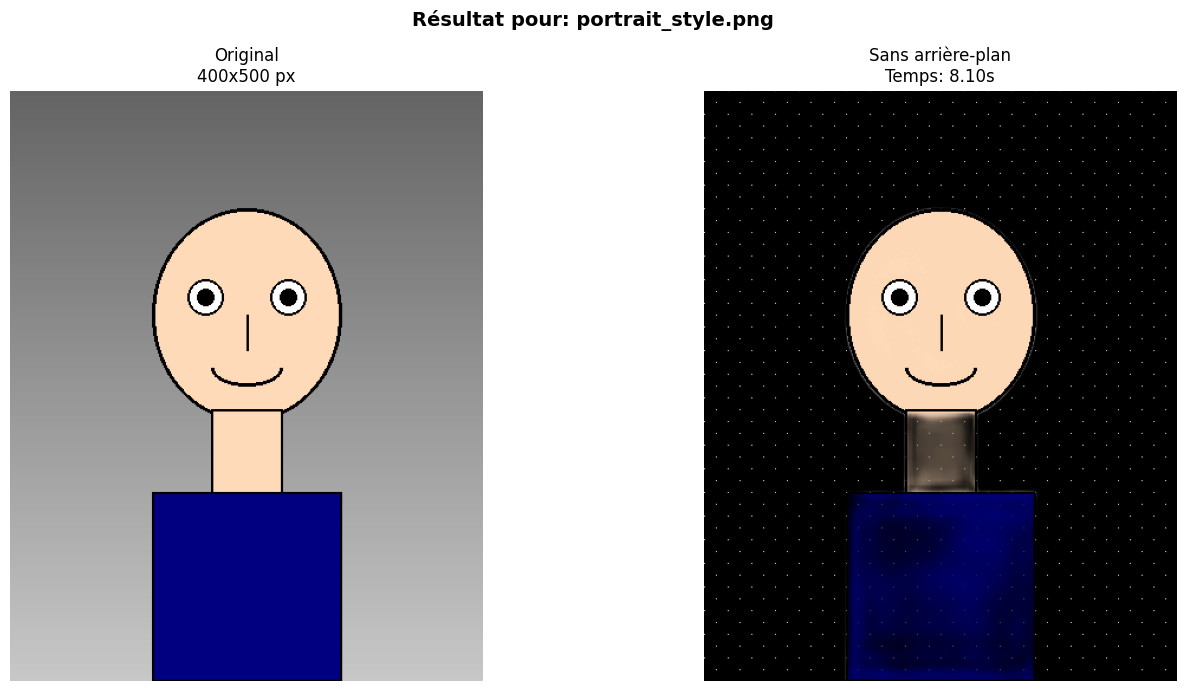


📊 Statistiques pour portrait_style.png:
   ⏱️  Temps de traitement: 8.101s
   📏 Dimensions: 400 x 500 px
   💾 Taille entrée: 3.7 KB
   💾 Taille sortie: 31.2 KB
   📉 Ratio: 852.3%
🔄 Traitement de: person_silhouette.png


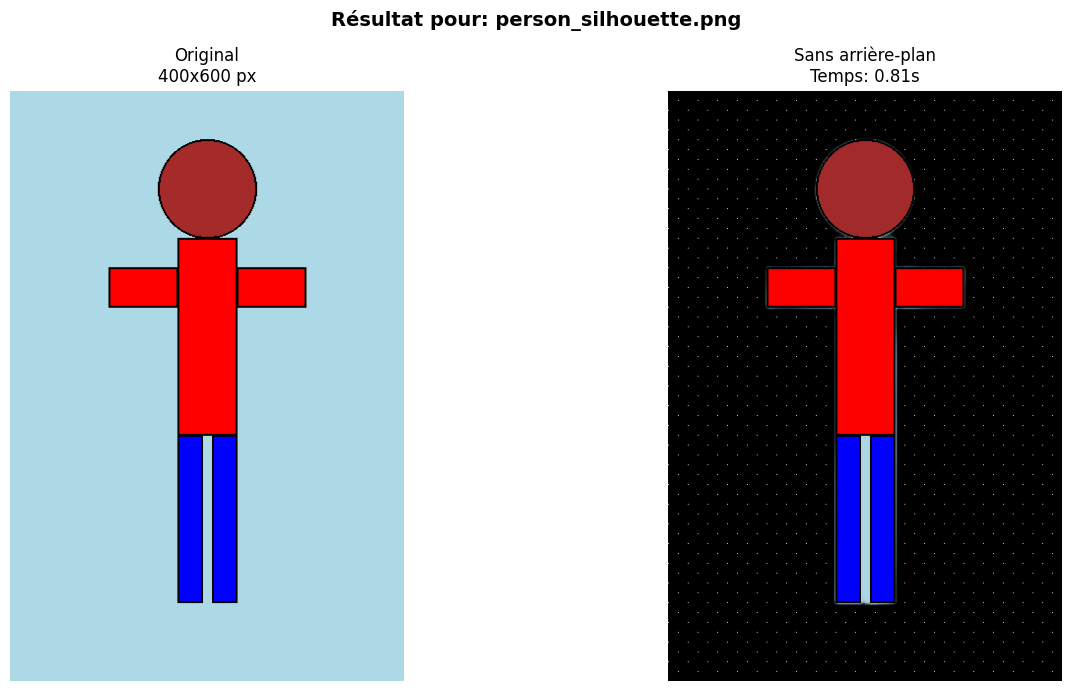


📊 Statistiques pour person_silhouette.png:
   ⏱️  Temps de traitement: 0.812s
   📏 Dimensions: 400 x 600 px
   💾 Taille entrée: 2.6 KB
   💾 Taille sortie: 15.0 KB
   📉 Ratio: 579.7%
🔄 Traitement de: geometric_shapes.png


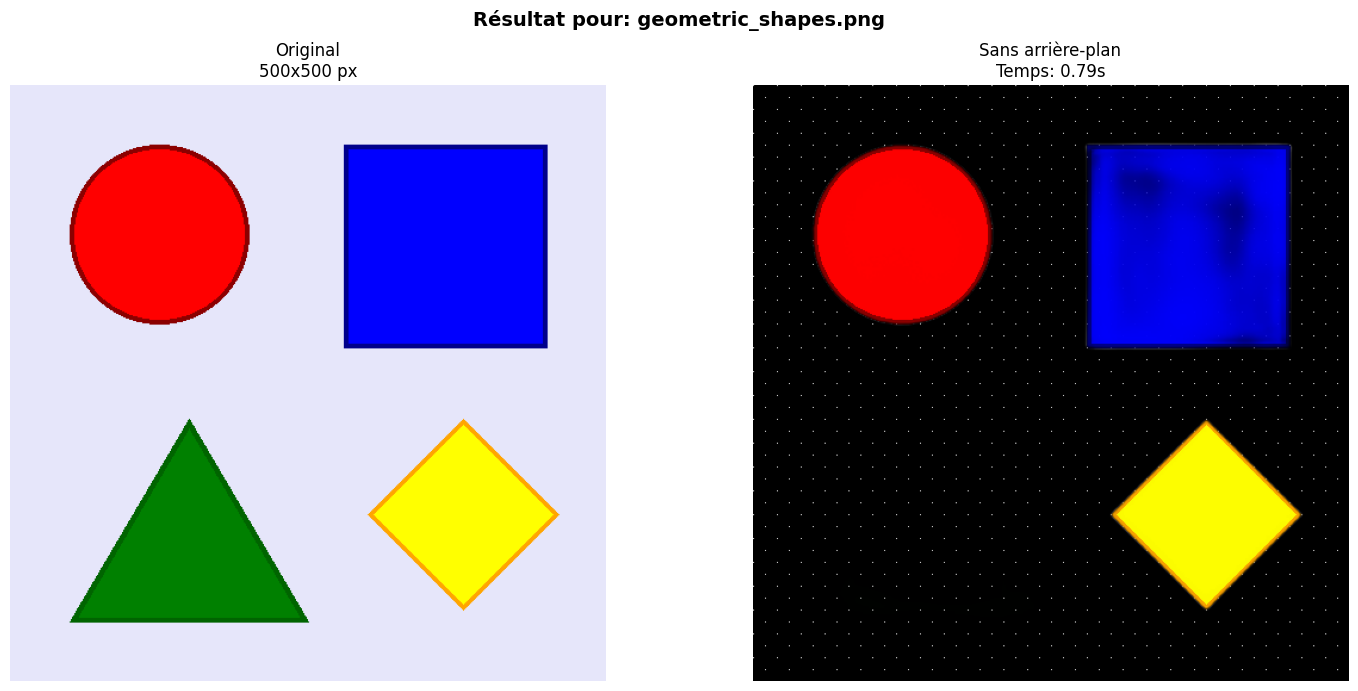


📊 Statistiques pour geometric_shapes.png:
   ⏱️  Temps de traitement: 0.789s
   📏 Dimensions: 500 x 500 px
   💾 Taille entrée: 4.4 KB
   💾 Taille sortie: 35.7 KB
   📉 Ratio: 819.4%
🔄 Traitement de: complex_scene.png


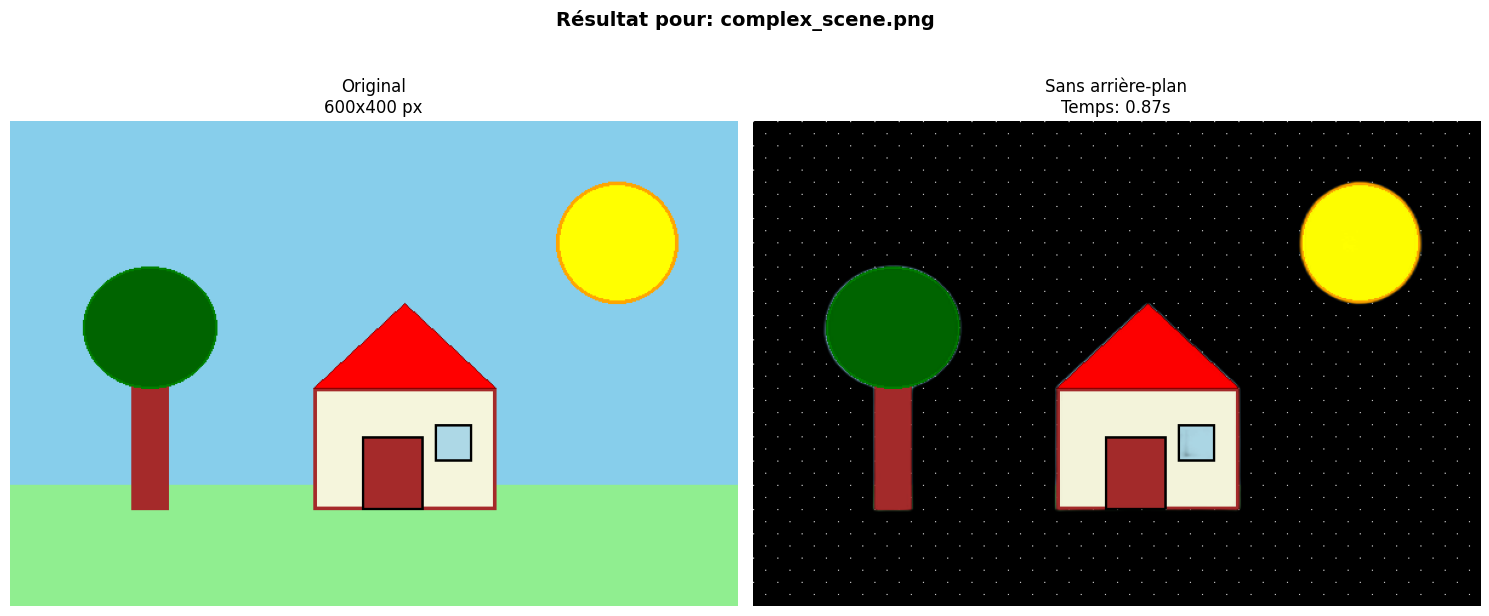


📊 Statistiques pour complex_scene.png:
   ⏱️  Temps de traitement: 0.866s
   📏 Dimensions: 600 x 400 px
   💾 Taille entrée: 3.3 KB
   💾 Taille sortie: 22.9 KB
   📉 Ratio: 691.1%
🔄 Traitement de: object_on_background.png


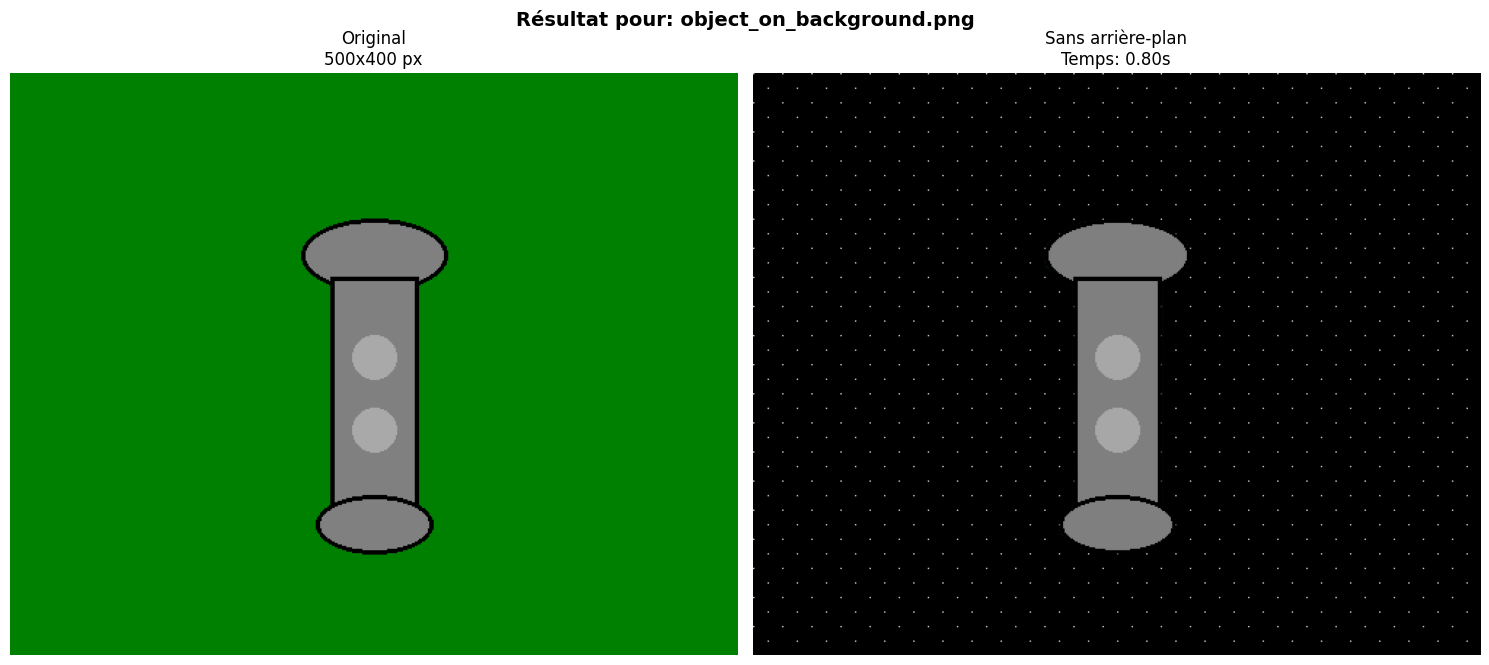


📊 Statistiques pour object_on_background.png:
   ⏱️  Temps de traitement: 0.801s
   📏 Dimensions: 500 x 400 px
   💾 Taille entrée: 2.3 KB
   💾 Taille sortie: 7.5 KB
   📉 Ratio: 324.1%
🔄 Traitement de: text_image.png


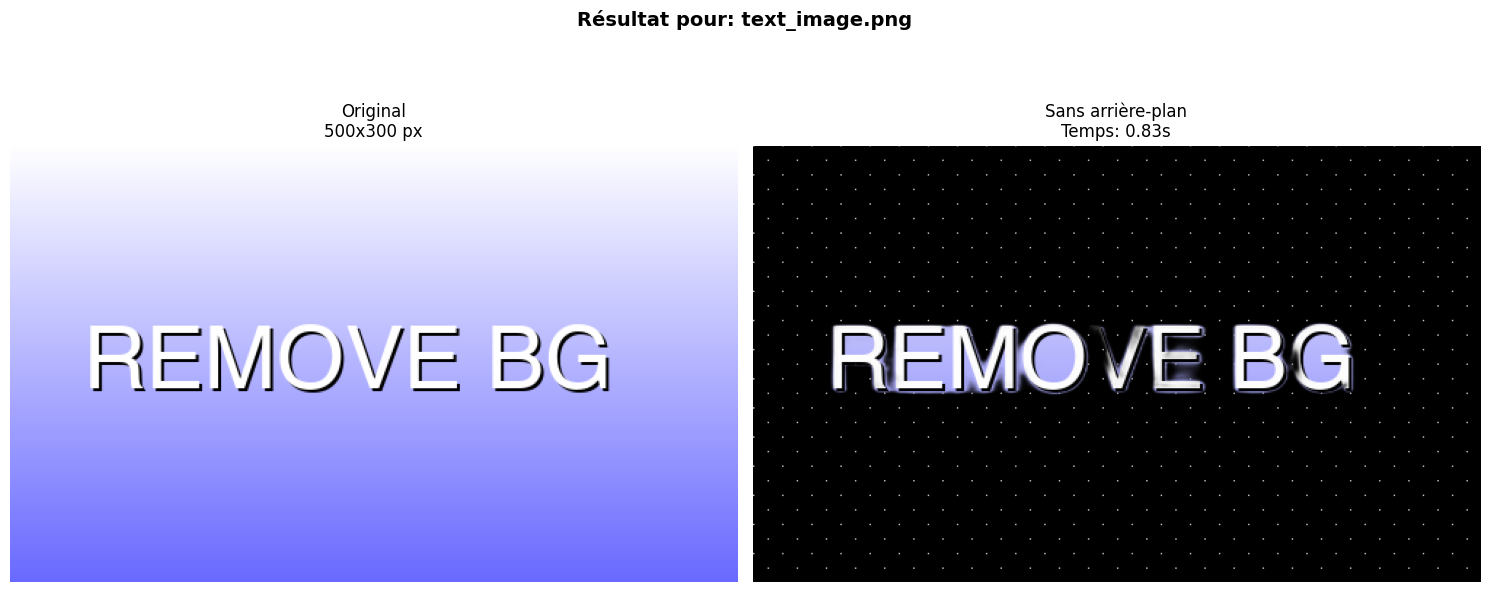


📊 Statistiques pour text_image.png:
   ⏱️  Temps de traitement: 0.833s
   📏 Dimensions: 500 x 300 px
   💾 Taille entrée: 10.0 KB
   💾 Taille sortie: 23.6 KB
   📉 Ratio: 236.0%

✅ Traitement terminé !


In [7]:
# Traiter chaque image
all_stats = []

print("🚀 Début du traitement...\n")

for img_file in image_files:
    # Définir le chemin de sortie
    output_file = OUTPUT_DIR / f"{img_file.stem}_no_bg.png"
    
    print(f"🔄 Traitement de: {img_file.name}")
    
    # Traiter l'image
    stats = process_image(img_file, output_file)
    all_stats.append(stats)
    
    # Afficher la comparaison
    display_comparison(img_file, output_file, stats)

print("\n✅ Traitement terminé !")

## 7. Statistiques globales


📈 STATISTIQUES GLOBALES
✅ Images traitées avec succès: 6/6

⏱️  Temps de traitement:
   - Moyen: 2.034s
   - Minimum: 0.789s
   - Maximum: 8.101s


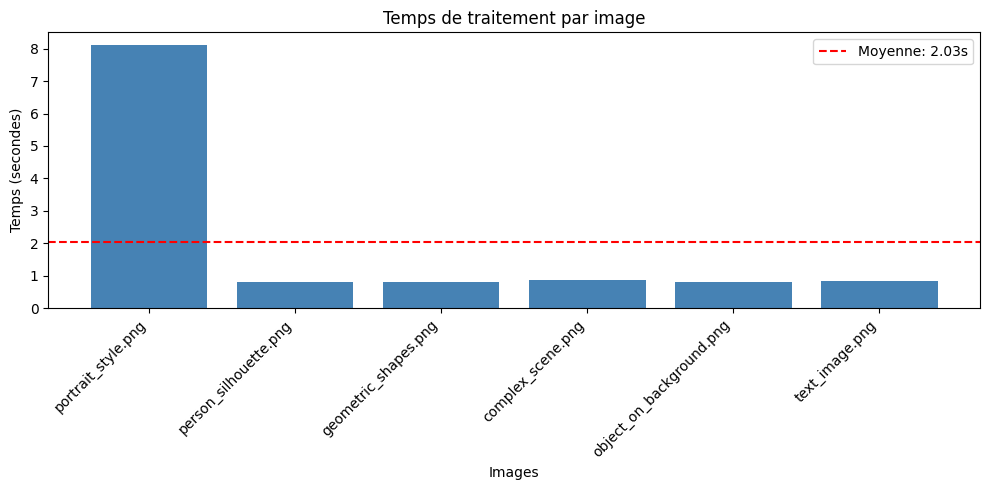

In [8]:
if all_stats:
    # Filtrer les traitements réussis
    successful_stats = [s for s in all_stats if s['success']]
    
    if successful_stats:
        # Calculer les moyennes
        avg_time = np.mean([s['processing_time'] for s in successful_stats])
        min_time = np.min([s['processing_time'] for s in successful_stats])
        max_time = np.max([s['processing_time'] for s in successful_stats])
        
        print("\n" + "="*60)
        print("📈 STATISTIQUES GLOBALES")
        print("="*60)
        print(f"✅ Images traitées avec succès: {len(successful_stats)}/{len(all_stats)}")
        print(f"\n⏱️  Temps de traitement:")
        print(f"   - Moyen: {avg_time:.3f}s")
        print(f"   - Minimum: {min_time:.3f}s")
        print(f"   - Maximum: {max_time:.3f}s")
        
        # Graphique des temps de traitement
        if len(successful_stats) > 1:
            plt.figure(figsize=(10, 5))
            filenames = [s['filename'] for s in successful_stats]
            times = [s['processing_time'] for s in successful_stats]
            
            plt.bar(range(len(filenames)), times, color='steelblue')
            plt.xlabel('Images')
            plt.ylabel('Temps (secondes)')
            plt.title('Temps de traitement par image')
            plt.xticks(range(len(filenames)), filenames, rotation=45, ha='right')
            plt.axhline(y=avg_time, color='r', linestyle='--', label=f'Moyenne: {avg_time:.2f}s')
            plt.legend()
            plt.tight_layout()
            plt.show()
    
    # Afficher les erreurs s'il y en a
    failed_stats = [s for s in all_stats if not s['success']]
    if failed_stats:
        print("\n⚠️  ERREURS:")
        for s in failed_stats:
            print(f"   ❌ {s['filename']}: {s['error']}")
else:
    print("\n⚠️  Aucune statistique à afficher.")

## 8. Test avec une URL (optionnel)

📥 Téléchargement de l'image...
🔄 Traitement en cours...
✅ Traitement terminé en 0.97s
💾 Résultat sauvegardé: images_output/from_url_no_bg.png


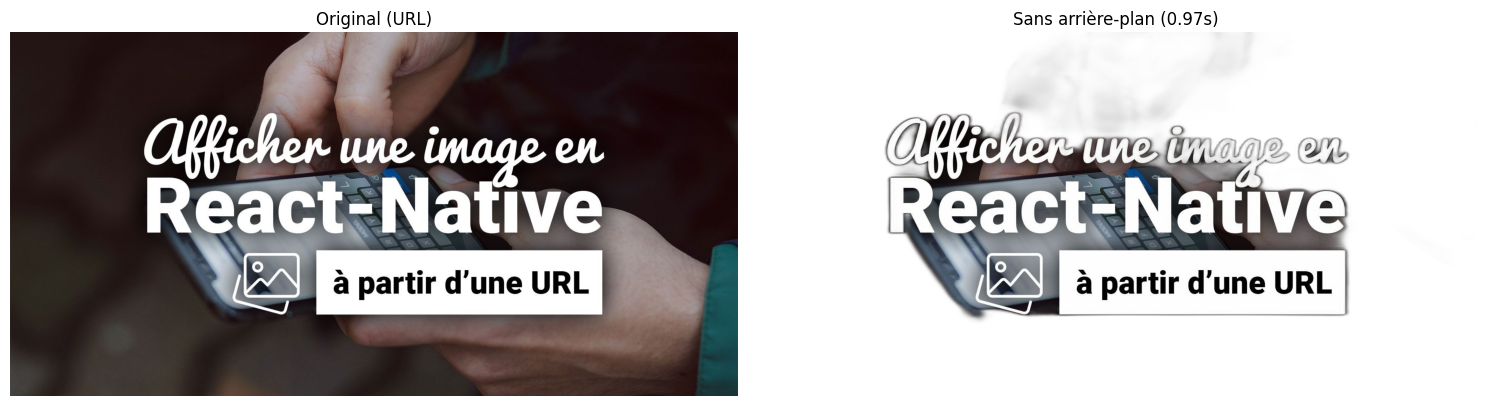

✅ Fonction pour traiter les URLs définie


In [10]:
from io import BytesIO
import requests

def process_from_url(url: str, output_filename: str = "from_url_no_bg.png"):
    """
    Télécharge une image depuis une URL et supprime son arrière-plan.
    """
    try:
        print(f"📥 Téléchargement de l'image...")
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        
        # Ouvrir l'image
        img = Image.open(BytesIO(response.content))
        
        print(f"🔄 Traitement en cours...")
        start_time = time.time()
        
        # Supprimer l'arrière-plan
        output = remove(img)
        
        processing_time = time.time() - start_time
        
        # Sauvegarder
        output_path = OUTPUT_DIR / output_filename
        output.save(output_path)
        
        print(f"✅ Traitement terminé en {processing_time:.2f}s")
        print(f"💾 Résultat sauvegardé: {output_path}")
        
        # Afficher les images
        fig, axes = plt.subplots(1, 2, figsize=(15, 7))
        axes[0].imshow(img)
        axes[0].set_title("Original (URL)")
        axes[0].axis('off')
        
        axes[1].imshow(output)
        axes[1].set_title(f"Sans arrière-plan ({processing_time:.2f}s)")
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Erreur: {e}")

# Exemple d'utilisation (décommenter et remplacer par une vraie URL)
process_from_url("https://cellar-c2.services.clever-cloud.com/content/2021/05/freestocks-mw6Onwg4frY-unsplash.jpg")

print("✅ Fonction pour traiter les URLs définie")

## 9. Notes et observations

Utilisez cette cellule pour noter vos observations:

**Qualité des résultats:**
- ...

**Cas problématiques identifiés:**
- ...

**Performances:**
- ...

**Recommandations:**
- ...